###GRU Chi2

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [4]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [5]:
dataset = dataset[['age','bp','al','su','bgr','bu','sc','hemo','pcv','wc','htn','appet','pe','ane','classification']]  #chi2

In [6]:
dataset

,age,bp,al,su,bgr,bu,sc,hemo,pcv,wc,htn,appet,pe,ane,classification
0,48,80,1,0,121,36.0,1.2,15.4,44,7800,1,0,0,0,0
1,7,50,4,0,121,18.0,0.8,11.3,38,6000,0,0,0,0,0
2,62,80,2,3,423,53.0,1.8,9.6,31,7500,0,1,0,1,0
3,48,70,4,0,117,56.0,3.8,11.2,32,6700,1,1,1,1,0
4,51,80,2,0,106,26.0,1.4,11.6,35,7300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,0,0,140,49.0,0.5,15.7,47,6700,0,0,0,0,1
396,42,70,0,0,75,31.0,1.2,16.5,54,7800,0,0,0,0,1
397,12,80,0,0,100,26.0,0.6,15.8,49,6600,0,0,0,0,1
398,17,60,0,0,114,50.0,1.0,14.2,51,7200,0,0,0,0,1


In [7]:
dataset.shape

(400, 15)

In [8]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [9]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
X

array([[48., 80.,  1., ...,  0.,  0.,  0.],
       [ 7., 50.,  4., ...,  0.,  0.,  0.],
       [62., 80.,  2., ...,  1.,  0.,  1.],
       ...,
       [12., 80.,  0., ...,  0.,  0.,  0.],
       [17., 60.,  0., ...,  0.,  0.,  0.],
       [58., 80.,  0., ...,  0.,  0.,  0.]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape

(300, 14)

In [15]:
scaler = MinMaxScaler()

In [16]:
X_test.shape

(100, 14)

In [17]:
y_test.shape

(100,)

In [18]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [19]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [20]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [22]:
import time
start_time = time.time()
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
model.fit(X_train,y_train,epochs=100,batch_size=150,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 8s 2s/step - loss: 0.3721 - accuracy: 0.6167 - val_loss: 0.2580 - val_accuracy: 0.6500
Epoch 2/100
2/2 [==============================] - 0s 66ms/step - loss: 0.2616 - accuracy: 0.6167 - val_loss: 0.2311 - val_accuracy: 0.6500
Epoch 3/100
2/2 [==============================] - 0s 70ms/step - loss: 0.2497 - accuracy: 0.5300 - val_loss: 0.3029 - val_accuracy: 0.3500
Epoch 4/100
2/2 [==============================] - 0s 66ms/step - loss: 0.3050 - accuracy: 0.3867 - val_loss: 0.2932 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 63ms/step - loss: 0.2707 - accuracy: 0.4233 - val_loss: 0.2317 - val_accuracy: 0.6500
Epoch 6/100
2/2 [==============================] - 0s 71ms/step - loss: 0.2301 - accuracy: 0.6367 - val_loss: 0.2215 - val_accuracy: 0.6500
Epoch 7/100
2/2 [==============================] - 0s 63ms/step - loss: 0.2401 - accuracy: 0.6167 - val_loss: 0.2376 - val_accuracy: 0.6500
Epoch 8/100
2/2 [=================

###plot

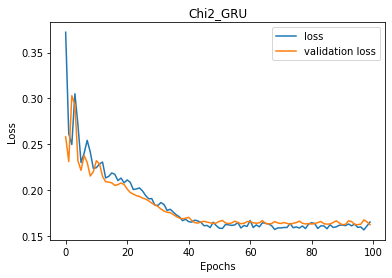

In [23]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Chi2_GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('Chi2_GRU.png', dpi=100)

In [24]:
from google.colab import files
files.download('Chi2_GRU.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 1s 6ms/step


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83        65
           1       0.65      0.97      0.78        35

    accuracy                           0.81       100
   macro avg       0.82      0.85      0.81       100
weighted avg       0.87      0.81      0.81       100



In [28]:
print(confusion_matrix(y_test,predictions))

[[47 18]
 [ 1 34]]


In [29]:
cnf_matrix = [[47, 18],[1, 35]]

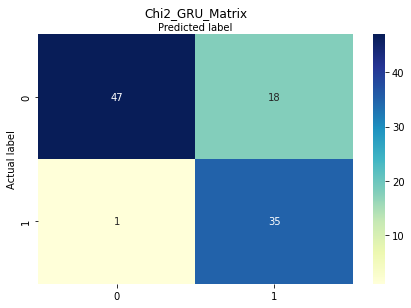

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Chi2_GRU_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Chi2_GRU_Matrix.png')
plt.show()

In [31]:
from google.colab import files
files.download('Chi2_GRU_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 